# Customer Segmentation using Agglomerative Clustering

### Import libraries

In [2]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

### Load Data From CSV File  

In [3]:
df = pd.read_csv("customers.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


### Pre-processing

In [7]:
df = df.loc[:25, ['Age','Income']]
df.head()

,Age,Income
0,0.535709,-0.785087
1,1.324111,0.840668
2,-0.515494,-0.022387
3,-1.041095,-0.785087
4,1.324111,3.911538


In [5]:
# Normalize data
from sklearn.preprocessing import scale
df['Age'] = scale(df['Age'])
df['Income'] = scale(df['Income'])
df.head()

,Age,Income
0,0.535709,-0.785087
1,1.324111,0.840668
2,-0.515494,-0.022387
3,-1.041095,-0.785087
4,1.324111,3.911538


### Modeling

In [6]:
model  =  AgglomerativeClustering(n_clusters=4)
model.fit(df)
labels = model.labels_
print(labels)

[0 1 0 3 2 1 1 1 3 1 1 0 3 0 3 3 3 0 1 0 3 0 3 1 1 1]


### Insights
We assign the labels to each row in dataframe.

In [8]:
df["cluster"] = labels
df.head(5)

,Age,Income,cluster
0,0.535709,-0.785087,0
1,1.324111,0.840668,1
2,-0.515494,-0.022387,0
3,-1.041095,-0.785087,3
4,1.324111,3.911538,2


Now, lets look at the distribution of customers based on their age and income:

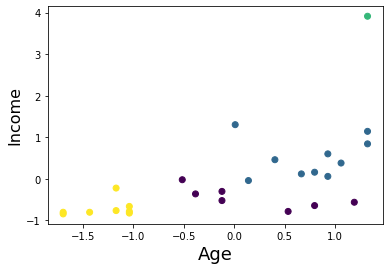

In [9]:
plt.scatter(df['Age'], df['Income'], c=labels.astype(np.float))
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

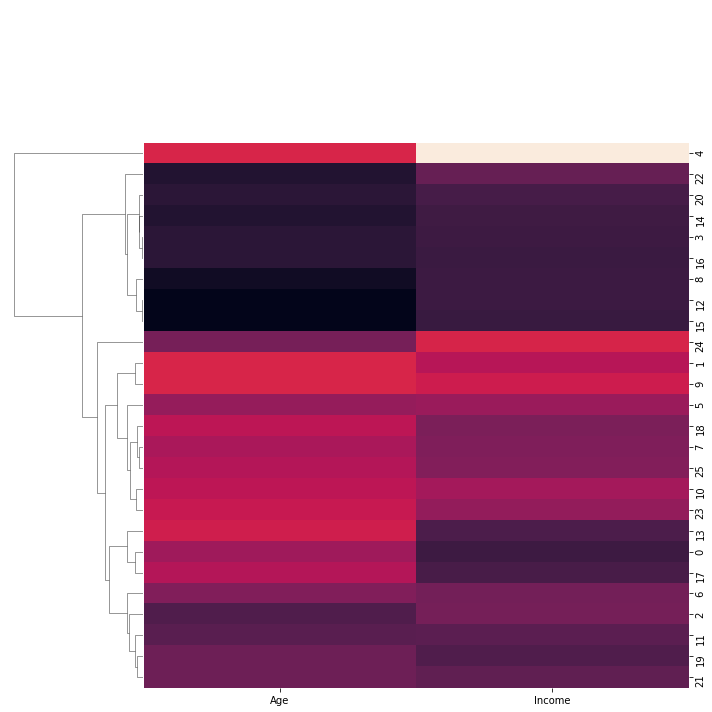

In [11]:
sns.clustermap(df[['Age','Income']], cbar_pos=None,  col_cluster=False)

## Dendrogram using scipy

In [12]:
from scipy.cluster.hierarchy import dendrogram, ward

In [14]:
linkage_array = ward(df)

(array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
        135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255]),
 <a list of 26 Text major ticklabel objects>)

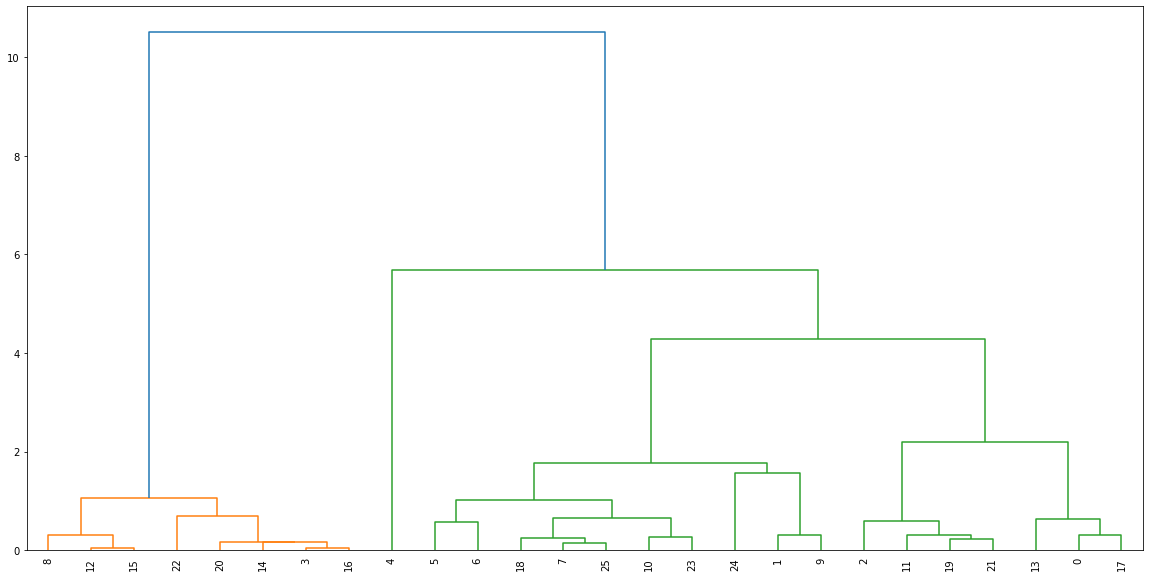

In [15]:
d = dendrogram(linkage_array)
plt.gca().figure.set_size_inches(20,10)
plt.xticks(rotation='vertical')